In [2]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Function to generate text for a specific field
def generate_document(prompt, max_length=200, temperature=0.9):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    output = model.generate(input_ids, max_length=max_length, temperature=temperature)
    return tokenizer.decode(output[0], skip_special_tokens=True)

# Generate documents for different fields
fields = {

    "finance": "Navigating the complexities of modern finance.",
    "education": "Revolutionizing education through technology.",
    "environment": "Protecting the environment for a sustainable future.",
}


generated_documents = {}

for field, prompt in fields.items():
    generated_documents[field] = generate_document(prompt)

# Print generated documents
for field, document in generated_documents.items():
    print(f"--- {field.capitalize()} ---")
    print(document)
    print("\n")
    
    


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


--- Finance ---
Navigating the complexities of modern finance.

The first step is to understand the financial system. The financial system is a complex system that is complex because it is based on a set of rules and regulations. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules a

In [3]:
corpus=[]
i=0
for field,document in generated_documents.items():
    corpus.append(document) 
for  doc in corpus:
    i=i+1
    print(i,"_",doc,'\n\n\n')
    
  

1 _ Navigating the complexities of modern finance.

The first step is to understand the financial system. The financial system is a complex system that is complex because it is based on a set of rules and regulations. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulations of the financial system. The rules and regulations are based on the rules and regulatio

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Download necessary resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
# Step 3: Text preprocessing
def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Removing words that have numbers in them
    text = re.sub(r'\w\d\w', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
   
    # Join tokens back into a single string
    preprocessed_text = ' '.join(words)

    return preprocessed_text
  
preprocessed_texts=[]
for document in corpus:
  preprocessed_texts.append(preprocess_text(document))
  

for  document in preprocessed_texts:
    
    print(document)
    print("\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MGTC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MGTC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MGTC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


navigating complexity modern finance first step understand financial system financial system complex system complex based set rule regulation rule regulation based rule regulation financial system rule regulation based rule regulation financial system rule regulation based rule regulation financial system rule regulation based rule regulation financial system rule regulation based rule regulation financial system rule regulation based rule regulation financial system rule regulation based rule regulation financial system rule regulation based rule regulation financial system rule regulation based rule regulation financial system rule regulation based rule regulation financial


revolutionizing education technology first step process create new system education based principle american revolution american revolution revolution education child poor revolution education child rich revolution education child poor revolution education child rich revolution education child poor revolution ed

In [5]:
def get_unique_words(preprocessed_text):
    # Split the preprocessed text into words
   words=[]
   for doc in preprocessed_text:
       for word in doc.split():
           words.append(word)
           
    # Convert the list of words into a set to get unique words
   unique_words = set(words)
   unique_words=sorted(unique_words)

   return unique_words

unique_words=get_unique_words(preprocessed_texts)
print(unique_words)
print(len(unique_words))
    


['agency', 'american', 'based', 'child', 'complex', 'complexity', 'create', 'education', 'environment', 'environmental', 'epa', 'finance', 'financial', 'first', 'future', 'largest', 'modern', 'nation', 'navigating', 'new', 'poor', 'principle', 'process', 'protecting', 'protection', 'regulating', 'regulation', 'responsible', 'revolution', 'revolutionizing', 'rich', 'rule', 'set', 'step', 'sustainable', 'system', 'technology', 'understand']
38


# TF-IDF usign sklearn equations

TF

In [6]:
import pandas as pd

tf = pd.DataFrame(columns=list(unique_words))

for i ,doc in enumerate(preprocessed_texts):
    row=[]
    for word in unique_words:
        word_frequency =doc.count(word)
        row.append(word_frequency)
    tf.loc[i]=row
# Print the DataFrame without row indices
tf

,agency,american,based,child,complex,complexity,create,education,environment,environmental,...,revolution,revolutionizing,rich,rule,set,step,sustainable,system,technology,understand
0,0,0,11,0,3,1,0,0,0,0,...,0,0,0,21,1,1,0,12,0,1
1,0,2,1,12,0,0,1,14,0,0,...,15,1,2,0,0,1,0,1,1,0
2,3,0,0,0,0,0,0,0,16,1,...,0,0,0,0,0,0,14,0,0,0


IDF

In [7]:
from  math import log
import numpy as np

N=tf.shape[0]
idf_vector=[]
for word in unique_words:
    nt=0
    for doc in preprocessed_texts:
        if (word in doc):
            nt=nt+1
    idf=log((1+N)/(1+nt))+1
    idf_vector.append(idf)


idf_vector=np.array(idf_vector)
print(idf_vector.shape)
print(idf_vector)

(38,)
[1.69314718 1.69314718 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.28768207 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.69314718 1.69314718 1.69314718 1.28768207 1.69314718 1.28768207
 1.69314718 1.69314718]


In [8]:
tfidf_matrix=pd.DataFrame(columns=list(unique_words))
for row_index in range(tf.shape[0]):
    row=[]
    for column_index in range(tf.shape[1]):
        tfidf=tf.iat[row_index,column_index]*idf_vector[column_index]
        row.append(tfidf)
    tfidf_matrix.loc[row_index]=row

tfidf_matrix
         

,agency,american,based,child,complex,complexity,create,education,environment,environmental,...,revolution,revolutionizing,rich,rule,set,step,sustainable,system,technology,understand
0,0.000000,0.000000,14.164503,0.000000,5.079442,1.693147,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,35.556091,1.693147,1.287682,0.000000,15.452185,0.000000,1.693147
1,0.000000,3.386294,1.287682,20.317766,0.000000,0.000000,1.693147,23.704061,0.000000,0.000000,...,25.397208,1.693147,3.386294,0.000000,0.000000,1.287682,0.000000,1.287682,1.693147,0.000000
2,5.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.090355,1.693147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.704061,0.000000,0.000000,0.000000


normalized tf idf 

In [9]:
normalized_tfidf_matrix=pd.DataFrame(columns=list(unique_words))
for row_index in range ( tfidf_matrix.shape[0]):
    row=[]
    for column_index in range (tfidf_matrix.shape[1]):
        normalized_tfidf=tfidf_matrix.iat[row_index,column_index]/np.sqrt(sum(tfidf_matrix.iloc[row_index] ** 2))
        row.append(normalized_tfidf)
    normalized_tfidf_matrix.loc[row_index]=row     
    
normalized_tfidf_matrix

,agency,american,based,child,complex,complexity,create,education,environment,environmental,...,revolution,revolutionizing,rich,rule,set,step,sustainable,system,technology,understand
0,0.000000,0.000000,0.241960,0.000000,0.086768,0.028923,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.607375,0.028923,0.021996,0.00000,0.263957,0.000000,0.028923
1,0.000000,0.077714,0.029552,0.466283,0.000000,0.000000,0.038857,0.543997,0.000000,0.000000,...,0.582854,0.038857,0.077714,0.000000,0.000000,0.029552,0.00000,0.029552,0.038857,0.000000
2,0.086747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.462652,0.028916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.40482,0.000000,0.000000,0.000000


# Bouns

In [10]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_texts)

# Convert TF-IDF matrix to an array for easier manipulation
tfidf_matrix_array = tfidf_matrix.toarray()

# Get feature names (terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create DataFrame with TF-IDF values
df_tfidf = pd.DataFrame(tfidf_matrix_array, columns=feature_names)

# Print DataFrame
df_tfidf

,agency,american,based,child,complex,complexity,create,education,environment,environmental,...,revolution,revolutionizing,rich,rule,set,step,sustainable,system,technology,understand
0,0.000000,0.000000,0.242468,0.000000,0.057967,0.028983,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.608649,0.028983,0.022043,0.000000,0.264510,0.000000,0.028983
1,0.000000,0.079473,0.030221,0.476839,0.000000,0.000000,0.039737,0.556312,0.000000,0.000000,...,0.556312,0.039737,0.079473,0.000000,0.000000,0.030221,0.000000,0.030221,0.039737,0.000000
2,0.087894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.439469,0.029298,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.410171,0.000000,0.000000,0.000000


cosine similarity between TFIDF from Scratch code and built in (sklearn)

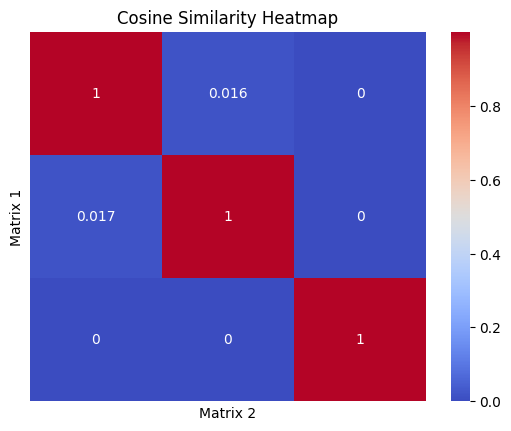

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
cos_sim = cosine_similarity(df_tfidf, normalized_tfidf_matrix)



sns.heatmap(cos_sim, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Matrix 2')
plt.ylabel('Matrix 1')
plt.show()